# Processamento digital de imagens
## Projeto 4 - Filtragem especial
Esse notebook tem o objetivo de aplicar filtragem por média e mediana, além de filtragem gaussiana e analisar os resultados

- Notebook desenvolvido por: Marcos Vinicius Silva - 202204192

In [5]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [6]:
img = cv2.imread('/content/Fig0335(a)(ckt_board_saltpep_prob_pt05).tif', cv2.IMREAD_GRAYSCALE)

In [2]:
def calcular_histograma(imagem):
    """Calcula o histograma de uma imagem."""
    histograma = np.zeros(256, dtype=int)
    altura, largura = imagem.shape[:2]
    for i in range(altura):
        for j in range(largura):
            nivel_pixel = imagem[i, j]
            histograma[nivel_pixel] += 1
    return histograma

# Filtros de média e mediana
**Filtro de média**: O filtro de média funciona substituindo o valor de cada elemento pela média dos valores de seus vizinhos dentro de uma determinada janela. Isso resulta em uma suavização geral da imagem, diminuindo variações abruptas.<br><br>
**Ponto de atenção**: O filtro de média pode borrar bordas pois ele suaviza os valores dos pixels, quando há uma transição entre áreas de cores ou intensidades diferentes o filtro de média mistura valores dos dois lados da borda, deixando a imagem um pouco embaçada.<br><br>
Aplicação: <br><br>
[90,92,91]<br>
[89,250,90]  <- 250 é um ruído<br>
[88,90,89]<br><br>
$$
\text{Média} = \frac{90 + 92 + 91 + 89 + 250 + 90 + 88 + 90 + 89}{9} = \frac{929}{9} \approx 103.2
$$<br><br>
Novo valor: <br>
<br>
$$[90,92,91]$$ <br>
$$[89,103,90]$$ <br>
$$[88,90,89]$$ <br><br>

In [7]:
# Função para aplicar filtro de média
def filtro_media(img):
    img = img.astype(np.float32)
    saida = np.zeros_like(img)
    h, w = img.shape

    for i in range(1, h - 1):
        for j in range(1, w - 1):
            vizinhanca = img[i-1:i+2, j-1:j+2]
            media = np.mean(vizinhanca)
            saida[i, j] = media
    return saida.astype(np.uint8)

img_mean = filtro_media(img)

# Filtro de mediana
**Filtro de mediana**: O filtro de mediana funciona substituindo o valor do elemento pela mediana dos valores dos vizinhos, ou seja, o valor que ocupa a posição central quando todos são ordenados, esse filtro é melhor para ruídos do tipo *sal e pimenta*

**Ruído sal e pimenta**:Esse ruído geralmente aparece como pontos brancos e pretos espalhados pela imagem, contrastando fortemente com os pixels ao redor. Ele pode ser causado por problemas como falhas na transmissão de dados, sensores com defeito em câmeras ou erros na digitalização. <br><br>
Aplicação: <br><br>
[90,92,91]<br>
[89,250,90]  <- 250 é um ruído<br>
[88,90,89]<br><br>
$Pixels\ ordenados = [88,89,89,90,90,91,92,250]$<br>
$Mediana= 90$
<br><br>
Novo valor: <br>
<br>
$$[90,92,91]$$ <br>
$$[89,90,90]$$ <br>
$$[88,90,89]$$ <br><br>

In [8]:
# Função para aplicar filtro de mediana
def filtro_mediana(img):
    saida = np.zeros_like(img)
    h, w = img.shape

    for i in range(1, h - 1):
        for j in range(1, w - 1):
            vizinhanca = img[i-1:i+2, j-1:j+2].flatten()
            mediana = np.median(vizinhanca)
            saida[i, j] = mediana
    return saida

img_mediana = filtro_mediana(img)

Text(0.5, 1.0, 'Filtro Mediana')

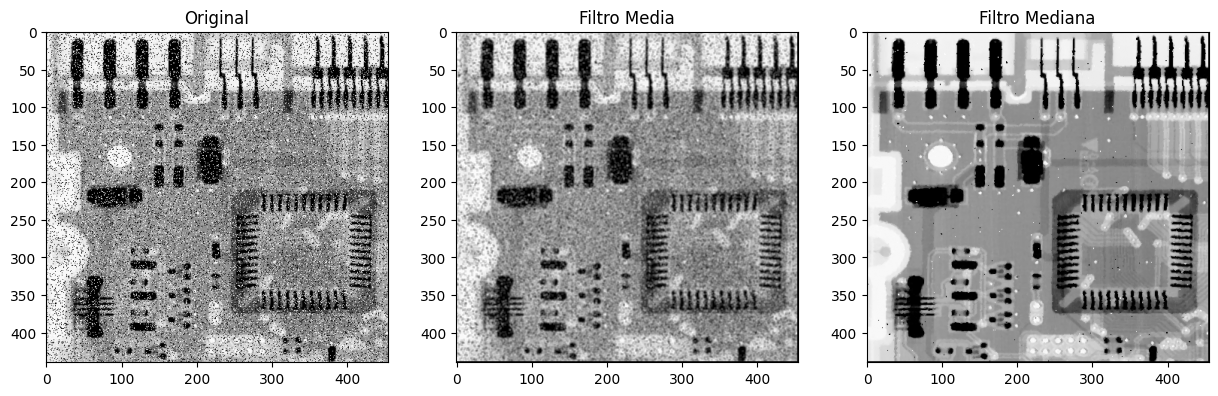

In [9]:
f, ax = plt.subplots(1, 3, figsize=(15,15))

ax[0].imshow(img, vmin=0, vmax=255, cmap='gray')
ax[0].set_title('Original')

ax[1].imshow(img_mean, cmap='gray')
ax[1].set_title('Filtro Media')

ax[2].imshow(img_mediana, cmap='gray')
ax[2].set_title('Filtro Mediana')


# Conclusões
- O filtro de média tende a suavizar a imagem, reduzindo o ruído. No entanto, nessa suavização a imagem pode perder um pouco de nitidez, e os detalhes podem ficar um pouco borrados.
- O filtro de mediana também é eficaz na redução de ruído, especialmente o tipo de ruído que aparece como "pontos" isolados (como sal e pimenta). A grande vantagem é que ele tende a preservar melhor as bordas e os detalhes da imagem em comparação com o filtro de média

# Aplicando ruído gaussiano
**Definição**: Ruído Gaussiano é um tipo de ruído estatístico com distribuição de probabilidade normal,, centrada em um valor médio (geralmente zero), com variação determinada por um desvio padrão

In [11]:
def ruido_gaussiano(img, media=0, desvio=20):
    img = img.astype(np.float32)
    ruido = np.random.normal(media, desvio, img.shape)
    img_ruido = img + ruido
    img_ruido = np.clip(img_ruido, 0, 255).astype(np.uint8)
    return img_ruido

img_ruido = ruido_gaussiano(img_mediana)
hist_ruido = calcular_histograma(img_ruido)

Text(0.5, 1.0, 'Histograma ruído gaussiano')

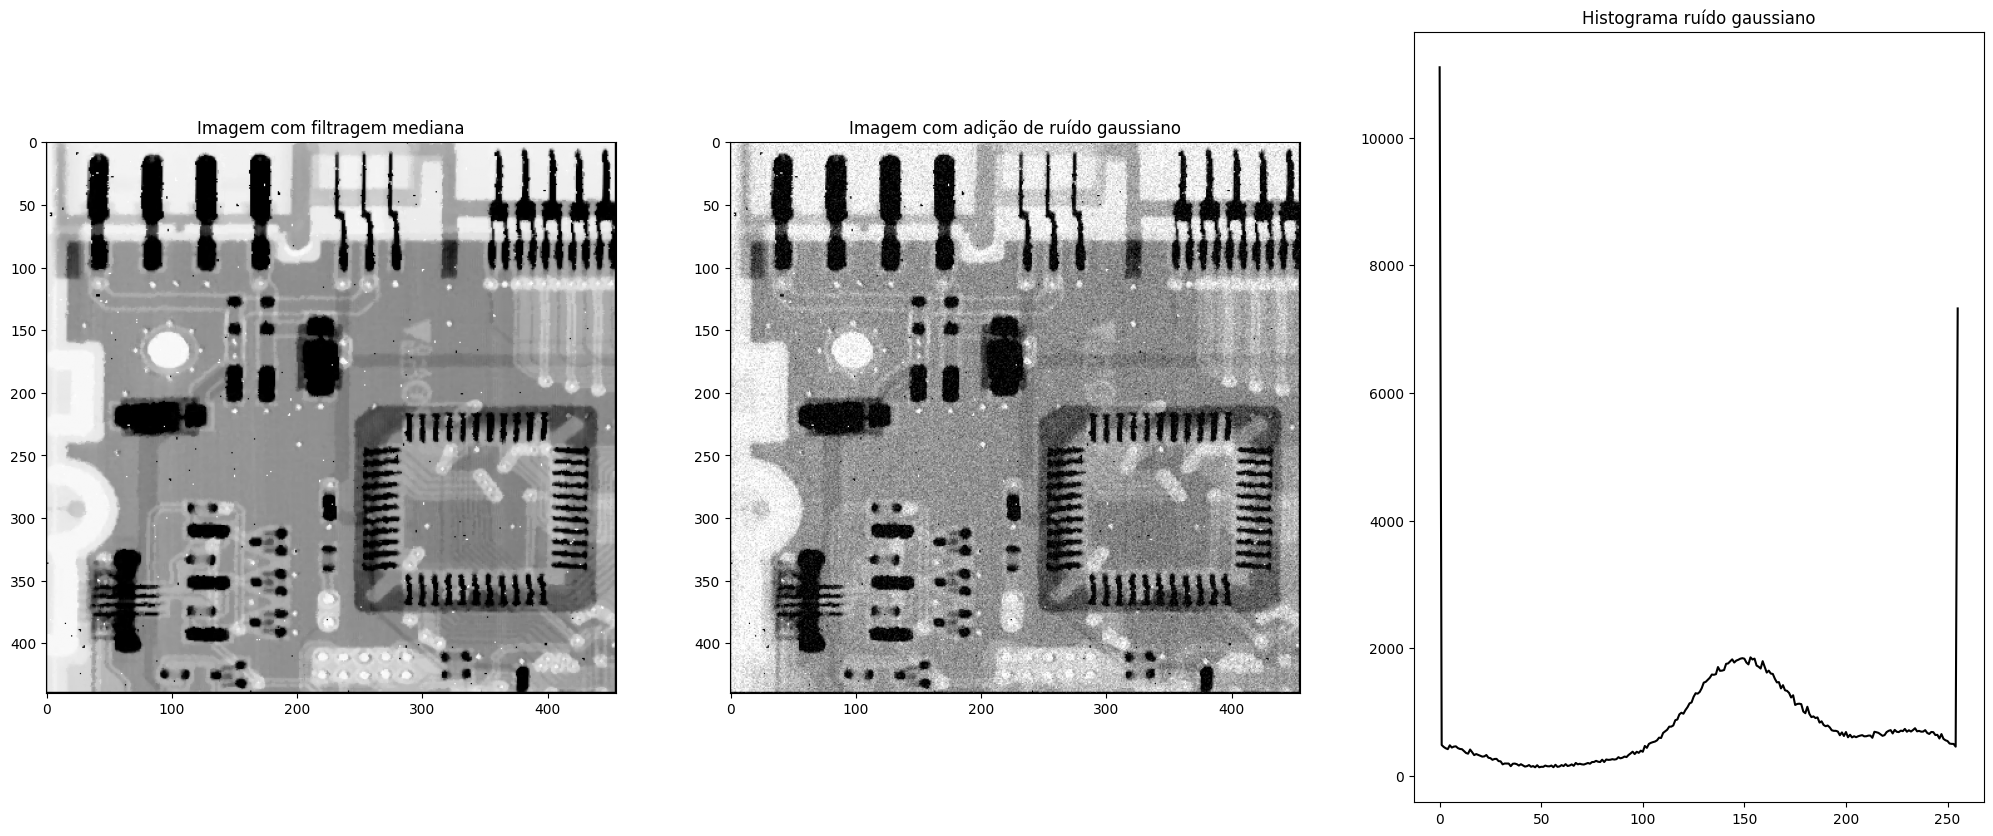

In [18]:
f, ax = plt.subplots(1, 3, figsize=(25,10))
ax[0].imshow(img_mediana, vmin=0, vmax=255, cmap='gray')
ax[0].set_title('Imagem com filtragem mediana')

ax[1].imshow(img_ruido, vmin=0, vmax=255, cmap='gray')
ax[1].set_title('Imagem com adição de ruído gaussiano')

ax[2].plot(hist_ruido,color='k')
ax[2].set_title('Histograma ruído gaussiano')

- Adicionar ruído gaussiano deixa a imagem granulada
---

# Aplicando filtro gaussiano
Para a aplicação desse filtro vamos utilizar uma abordagem com 2 funções
- Kernel:
A função kernel é responsável por gerar um kernel Gaussiano 2D, que nada mais é do que uma pequena matriz de pesos usada para suavizar a imagem. Esses pesos são calculados a partir da fórmula da distribuição normal, e sua função é dar mais importância aos pixels próximos ao centro da vizinhança, diminuindo a influência dos pixels mais distantes. O resultado é uma matriz simétrica que, ao ser aplicada sobre a imagem, produz um efeito de desfoque suave. A normalização do kernel (dividindo pela soma de seus valores) garante que o brilho geral da imagem seja preservado.<br>
- Filtro gaussiano: A função filtro_gaussiano aplica esse kernel sobre a imagem utilizando a técnica de convolução. Esse processo consiste em percorrer cada pixel da imagem e, para cada um, multiplicar sua vizinhança pelos valores correspondentes do kernel e somar os resultados. Esse valor final substitui o valor original do pixel na imagem filtrada. Para evitar perda de informação nas bordas, é utilizado padding com uma cópia espelhada das suas bordas. O resultado é uma nova imagem suavizada, onde os detalhes de alta frequência (como ruídos e bordas muito intensas) são atenuados, e a transição entre regiões fica mais suave.


In [19]:
def kernel(size, sigma=1):
    """Gera um kernel Gaussiano 2D."""
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)

In [20]:
def filtro_gaussiano(image, kernel):
    """Aplica a convolução 2D entre imagem e kernel."""
    h, w = image.shape
    k = kernel.shape[0] // 2
    output = np.zeros_like(image, dtype=np.float32)

    # Padding para evitar perda nas bordas
    padded_img = np.pad(image, pad_width=k, mode='reflect')

    for i in range(h):
        for j in range(w):
            region = padded_img[i:i+2*k+1, j:j+2*k+1]
            output[i, j] = np.sum(region * kernel)

    return np.clip(output, 0, 255).astype(np.uint8)

Text(0.5, 1.0, 'Imagem com filtragem gaussiana')

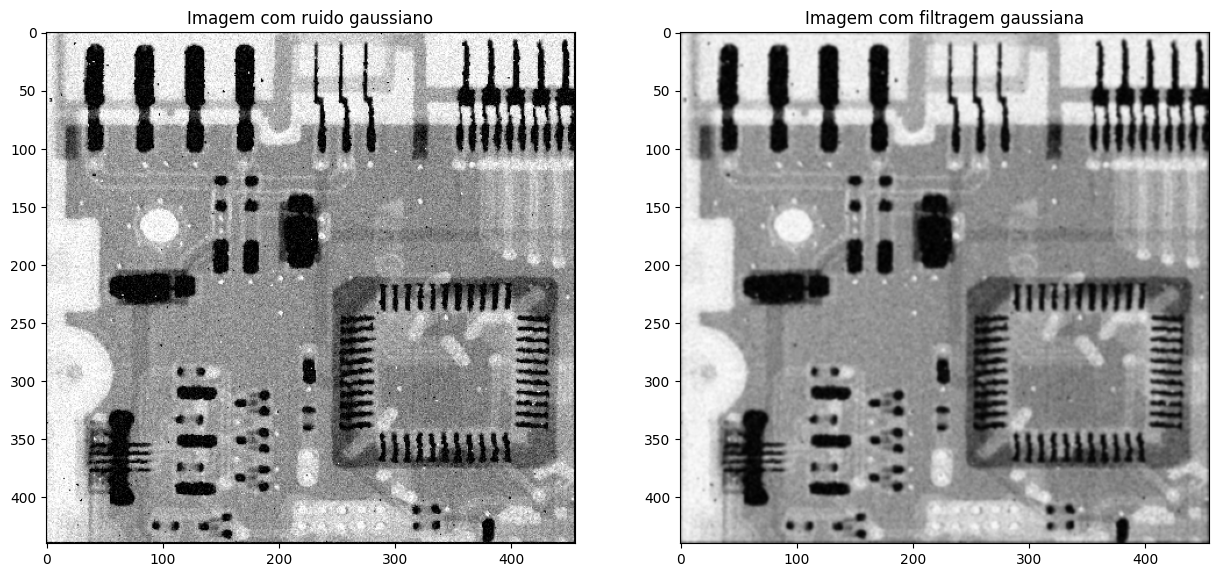

In [21]:
#Aplicando as funções
kernel = kernel(5, sigma=1)
img_gaussiana = filtro_gaussiano(img_ruido, kernel)

f, ax = plt.subplots(1, 2, figsize=(15,15))
ax[0].imshow(img_ruido, vmin=0, vmax=255, cmap='gray')
ax[0].set_title('Imagem com ruido gaussiano')

ax[1].imshow(img_gaussiana, vmin=0, vmax=255, cmap='gray')
ax[1].set_title('Imagem com filtragem gaussiana')

# Conclusão
- A principal conclusão é que o filtro gaussiano consegue diminuir consideravelmente a granulosidade causado pelo ruído gaussiano na imagem original.
- A imagem filtrada é mais suave do que a original apesar de levar uma certa perda de nitidez